# <span style="color:red">++++++++++++++++++++++Ayad++++++++++++++++++++++</span>

# <span style="color:red">1- Data</span>

In [1]:
import pandas as pd

data = pd.read_csv(r'D:\Projects\Machine Learning\Unsupervised Learning\data.csv')
data.head()

,0,1,2,3,4,5,6,7
0,-2.084839,-0.471673,-0.955542,-0.567288,-0.953226,-1.510386,0.921728,0.437954
1,0.003700,-0.999118,0.202003,1.612001,-0.375642,0.378518,0.113693,1.718011
2,-1.456240,0.483522,-0.508605,-0.316406,-1.695560,-1.943310,0.299486,0.147370
3,-1.595524,-0.219744,1.039403,0.381587,0.109094,-0.155068,0.156054,0.007314
4,0.995277,-1.517259,-0.101198,1.415742,-0.054356,0.611216,0.196938,0.641809


In [3]:
data.shape

(1309, 8)

In [4]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

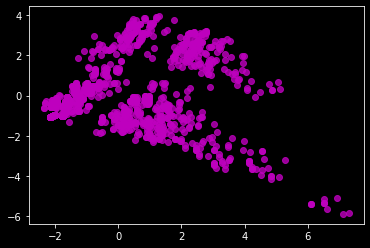

In [5]:
plt.scatter(data.iloc[:, 0].values, data.iloc[:, 1].values, c = 'm', alpha=0.8)
plt.show()

# <span style="color:red">2- K_number Selection</span>

## <span style="color:blue">2.1 Elbow method</span>

In [7]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [8]:
inertias = [KMeans(n_clusters = k, random_state = 33).fit(data).inertia_ for k in range(1, 6)]

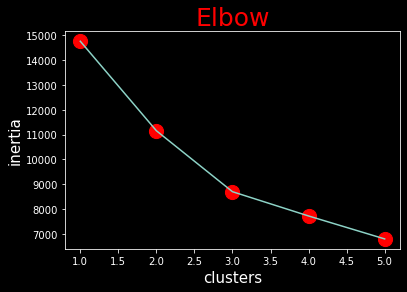

In [10]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.plot   (range(1,6), inertias)
plt.scatter(range(1,6), inertias, marker='o', c='red', s=200)


plt.title('Elbow', size=25, c='red')
plt.xlabel('clusters', size=15)
plt.ylabel('inertia', size=15)
plt.show()

 ### <span style="color:green">It turns out that 3 clusters are adequate</span>

In [11]:
def draw(colors):

    for i,c in enumerate(colors):
        plt.scatter(data.iloc[label==i, 0].values, data.iloc[label==i, 1].values, 
                    c=c, s=7, label=[f"cluster{i+1}"])


    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='y', s=200)


    plt.title('Clusters of customers', size=20, c='yellow')
    plt.xlabel('Annual Income (k$)', size=12)
    plt.ylabel('Spending Score (1-100)', size=12)


    plt.legend()
    plt.show()

In [12]:
km = KMeans(random_state = 33, n_clusters = 3)

label = km.fit_predict(data)

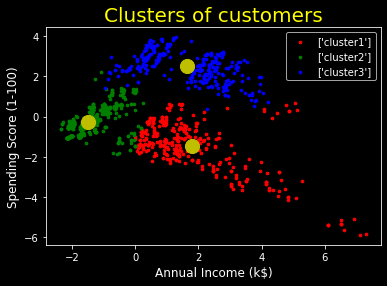

In [13]:
draw(['r', 'g', 'b'])

## <span style="color:blue">2.2 Silhouette score</span>

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
silhouette_score(data, km.labels_)

0.3287426081501814

In [16]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=33).fit(data) for k in range(1, 7)]

inertias = [model.inertia_ for model in kmeans_per_k]

In [17]:
silhouette_scores = [silhouette_score(data, model.labels_) for model in kmeans_per_k[1:]]

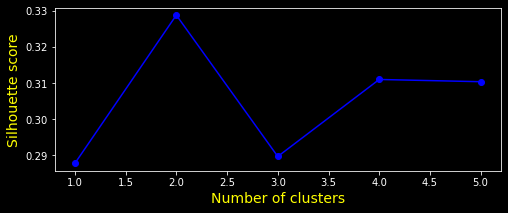

In [18]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 6), silhouette_scores, "bo-")

plt.xlabel("Number of clusters", fontsize=14, c='yellow')
plt.ylabel("Silhouette score", fontsize=14, c='yellow')

plt.show()

### <span style="color:green">It turns out here that 2 clusters are adequate</span>

In [25]:
km = KMeans(random_state = 33, n_clusters = 2)

labels = km.fit_predict(data)

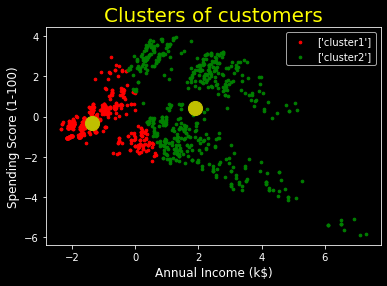

In [26]:
draw(['r', 'g'])

# <span style="color:red"> 3- MiniBatch clustering</span>

In [27]:
from sklearn.cluster import MiniBatchKMeans

In [28]:
mbkm = MiniBatchKMeans(n_clusters=3, random_state=33)

mbkm.fit(data)

mbkm_label = mbkm.predict(data)

set(mbkm.labels_)

{0, 1, 2}

In [29]:
silhouette_score(data, mbkm_label)

0.32934818572149555

# <span style="color:blue">3- Concatenate the labels with the data</span>

In [30]:
df = pd.DataFrame(labels, columns = ['Labels'])
df

,Labels
0,0
1,0
2,0
3,0
4,1
...,...
1304,0
1305,1
1306,1
1307,1


In [31]:
pd.concat([data, df], axis=1)

,0,1,2,3,4,5,6,7,Labels
0,-2.084839,-0.471673,-0.955542,-0.567288,-0.953226,-1.510386,0.921728,0.437954,0
1,0.003700,-0.999118,0.202003,1.612001,-0.375642,0.378518,0.113693,1.718011,0
2,-1.456240,0.483522,-0.508605,-0.316406,-1.695560,-1.943310,0.299486,0.147370,0
3,-1.595524,-0.219744,1.039403,0.381587,0.109094,-0.155068,0.156054,0.007314,0
4,0.995277,-1.517259,-0.101198,1.415742,-0.054356,0.611216,0.196938,0.641809,1
...,...,...,...,...,...,...,...,...,...
1304,-0.862703,0.104828,1.984113,-2.026618,-1.723234,1.355618,0.019176,0.361044,0
1305,0.299519,2.404711,-0.473917,0.539437,0.144996,1.079460,-0.593131,0.062784,1
1306,1.983708,-2.251345,-0.891493,0.934429,0.553115,1.194912,0.344667,-1.039349,1
1307,0.369343,3.529447,-0.542355,-1.130391,0.468369,-0.998843,0.550265,0.041131,1


# <span style="color:red">++++++++++++++++++++++Ayad++++++++++++++++++++++</span>
